# Running SLMs locally with Ollama

[Ollama](https://ollama.com/) is an open-source framework for running language models large and small locally. It provides access to [dozens of models](https://ollama.com/library), features a command-line interface (CLI) for loading and managing models, and automatically runs models on GPU when present. It also includes a local server through which models can be accessed using a REST API. Let's use Ollama to put the 3B-parameter version of [`Llama 3.2`](https://ollama.com/library/llama3.2) through its paces. The following examples use [Ollama](https://pypi.org/project/ollama/)'s Python SDK. Before running these examples, make sure Ollama is installed locally and execute an `ollama serve` command to start the Ollama server listening on port 11434.

Begin by listing all the models that have been downloaded.

In [1]:
import ollama

ollama.list()

{'models': [{'name': 'llava:7b',
   'model': 'llava:7b',
   'modified_at': '2024-11-11T10:09:55.1392499Z',
   'size': 4733363377,
   'digest': '8dd30f6b0cb19f555f2c7a7ebda861449ea2cc76bf1f44e262931f45fc81d081',
   'details': {'parent_model': '',
    'format': 'gguf',
    'family': 'llama',
    'families': ['llama', 'clip'],
    'parameter_size': '7B',
    'quantization_level': 'Q4_0'}},
  {'name': 'codegemma:7b',
   'model': 'codegemma:7b',
   'modified_at': '2024-11-11T09:57:31.5934662Z',
   'size': 5011852809,
   'digest': '0c96700aaada572ce9bb6999d1fda9b53e9e6cef5d74fda1e066a1ba811b93f3',
   'details': {'parent_model': '',
    'format': 'gguf',
    'family': 'gemma',
    'families': ['gemma'],
    'parameter_size': '9B',
    'quantization_level': 'Q4_0'}},
  {'name': 'llama3.2:1b',
   'model': 'llama3.2:1b',
   'modified_at': '2024-11-10T18:19:45.5732197Z',
   'size': 1321098329,
   'digest': 'baf6a787fdffd633537aa2eb51cfd54cb93ff08e28040095462bb63daf552878',
   'details': {'parent_

Use `Llama 3.2` to answer a simple question:

In [2]:
messages = [
    {
        'role': 'user',
        'content': 'Why is the sky blue?'
    }
]

response = ollama.chat(
    model='llama3.2',
    messages=messages
)

print(response['message']['content'])

The sky appears blue because of a phenomenon called scattering, which occurs when sunlight interacts with the tiny molecules of gases in the Earth's atmosphere.

Here's what happens:

1. When sunlight enters the Earth's atmosphere, it encounters the tiny molecules of nitrogen (N2) and oxygen (O2).
2. These molecules scatter the light in all directions, but they scatter shorter (blue) wavelengths more than longer (red) wavelengths.
3. This is known as Rayleigh scattering, named after the British physicist Lord Rayleigh, who first described it in the late 19th century.
4. As a result of this scattering, the blue light is dispersed throughout the atmosphere, reaching our eyes from all directions.
5. Our eyes perceive this scattered blue light as the color of the sky.

In contrast, the longer wavelengths of light (like red and orange) continue to travel in straight lines, without being significantly scattered. This means that when we look at the sky, we see mostly the blue light that has b

Ask the same question again, but this time stream the output:

In [3]:
response = ollama.chat(
    model='llama3.2',
    messages=messages,
    stream=True
)

for chunk in response:
    print(chunk['message']['content'], end='')

The sky appears blue because of a phenomenon called scattering, which occurs when sunlight interacts with the tiny molecules of gases in the Earth's atmosphere.

Here's what happens:

1. When sunlight enters the Earth's atmosphere, it encounters tiny molecules of gases such as nitrogen (N2) and oxygen (O2).
2. These molecules scatter the light in all directions, but they scatter shorter (blue) wavelengths more than longer (red) wavelengths.
3. This is known as Rayleigh scattering, named after the British physicist Lord Rayleigh, who first described it in the late 19th century.
4. As a result of this scattering, the blue light is distributed throughout the atmosphere, giving the sky its blue color.

The reason we don't see the red light as much is that our eyes are more sensitive to the shorter wavelengths of light, which are scattered in all directions by the tiny molecules. This is why the sky often appears more blue during the daytime when the sun is overhead.

It's worth noting that

Lower the temperature to 0.2 and ask `Llama 3.2` to write a Python function:

In [4]:
messages = [
    {
        'role': 'user',
        'content': 'Write a Python function that performs a bubble sort'
    }
]

response = ollama.chat(
    model='llama3.2',
    messages=messages,
    options={ 'temperature': 0.2 },
    stream=True
)

for chunk in response:
    print(chunk['message']['content'], end='')

def bubble_sort(arr):
    """
    This function sorts an array in ascending order using the Bubble Sort algorithm.

    Args:
        arr (list): The input list to be sorted.

    Returns:
        list: The sorted list.
    """

    # Get the length of the array
    n = len(arr)

    # Traverse through all array elements
    for i in range(n):
        
        # Last i elements are already in place
        for j in range(0, n-i-1):
            
            # Traverse the array from 0 to n-i-1
            # Swap if the element found is greater than the next element
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                
    return arr

# Example usage:
arr = [64, 34, 25, 12, 22, 11, 90]
print("Original array:", arr)
sorted_arr = bubble_sort(arr)
print("Sorted array:", sorted_arr)

This version of `Llama 3.2` features a 128K context window. Use that to summarize Microsoft's 2022 annual report. How does this summary compare to similar summaries produced by `GPT-4o` and `Gemini Flash`?

In [5]:
from IPython.display import Markdown, display

with open('Data/annual-report.txt', 'r') as file:
    report = file.read()

content = f'''
    Summarize the following annual report from Microsoft. Use
    markdown formatting in your output:

    {report}
    '''

messages = [{ 'role': 'user', 'content': content }]

response = ollama.chat(
    model='llama3.2',
    messages=messages
)

output = response['message']['content']
display(Markdown(output))

This is a comprehensive set of documents and resources for Microsoft Corporation's investors, shareholders, and stakeholders. Here are some key highlights:

**Investor Relations**

* Contact information: (800) 285-7772 or (425) 706-4400
* Investor Relations website: www.microsoft.com/investor
* Email: msft@microsoft.com
* Mailing address: One Microsoft Way, Redmond, WA 98052-6399

**Annual Meeting**

* Date: Tuesday, December 13, 2022
* Time: 8:30 a.m. Pacific Time
* Virtual Shareholder Meeting: www.virtualshareholdermeeting.com/MSFT22
* Submit questions via proxy voting site at www.proxyvote.com

**Shareholder Services**

* Computershare (transfer agent) can help with:
	+ Change of address
	+ Lost stock certificates
	+ Transfer of stock to another person
	+ Additional administrative services
* Contact Computershare: 800-285-7772, option 1 or visit online at: https://www.computershare.com/Microsoft

**Environmental, Social, and Governance (ESG)/Corporate Social Responsibility**

* Microsoft's Board of Directors provides insight, feedback, and oversight across a broad range of environmental and social matters.
* The company has made a broad range of environmental and social commitments.
* For more information, please visit: www.microsoft.com/transparency

**Shareholder Information**

* Shareholders can sign up for electronic alerts to access the annual report and proxy statement online.
* To sign up, visit the Annual Report site on the Investor Relations website at: http://www.microsoft.com/investor/AnnualReports/default.asp

This set of documents provides a comprehensive overview of Microsoft's investor relations, shareholder services, corporate social responsibility, and environmental, social, and governance (ESG) initiatives.

[`LLaVA`](https://llava-vl.github.io/), which stands for *Large Language and Vision Assistant*, is a state-of-the-art small MLLM from Microsoft. The model is open-source, and Ollama makes 7B, 13B, and 34B-parameter versions available for running locally. Let's load the 7B version and use it to analyze an image. Start by downloading the model if it hasn't been downloaded already:

In [6]:
import ollama

ollama.pull('llava:7b')

{'status': 'success'}

Load a photo of a playful Corgi:

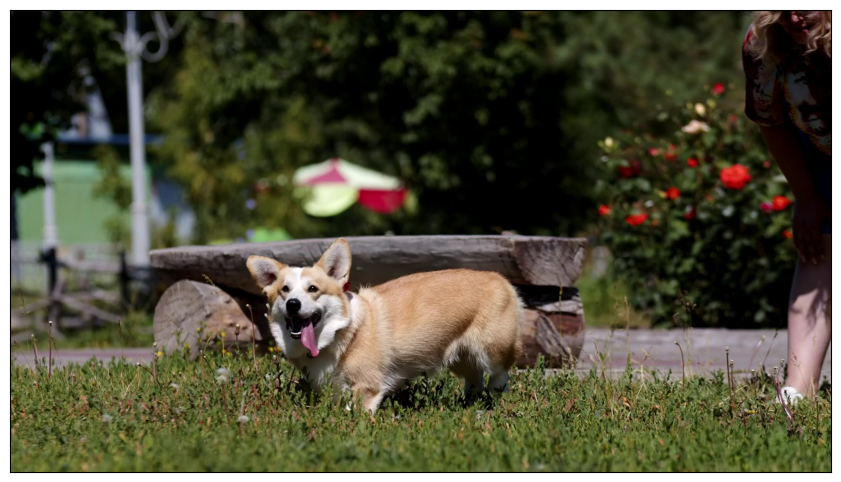

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('Data/corgi.png')
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(image)

Ask `LLaVA` to describe the image:

In [8]:
messages = [
    {
        'role': 'user',
        'content': 'Describe what you see in this image',
        'images': ['Data/corgi.png']
    }
]

response = ollama.chat(
    model='llava:7b',
    messages=messages,
    stream=True
)

for chunk in response:
    print(chunk['message']['content'], end='')

 The image is a composite of two different photos placed side by side. On the left, there is a photo of an outdoor scene featuring a dog with a surprised expression running across a grassy area next to a park bench and some greenery. A person can be seen in the background, seemingly interacting with the dog.

On the right side of the composite image, there's another photo showing what appears to be a corgi dog walking on a path surrounded by trees and bushes. The ground is covered in leaves, suggesting it might be autumn.

The overall style of the image suggests that it might be from a social media platform where users can combine multiple photos into one frame, often used for creating memes or highlighting key moments from a series of images. 

Load a photo of a confusing array of parking signs:

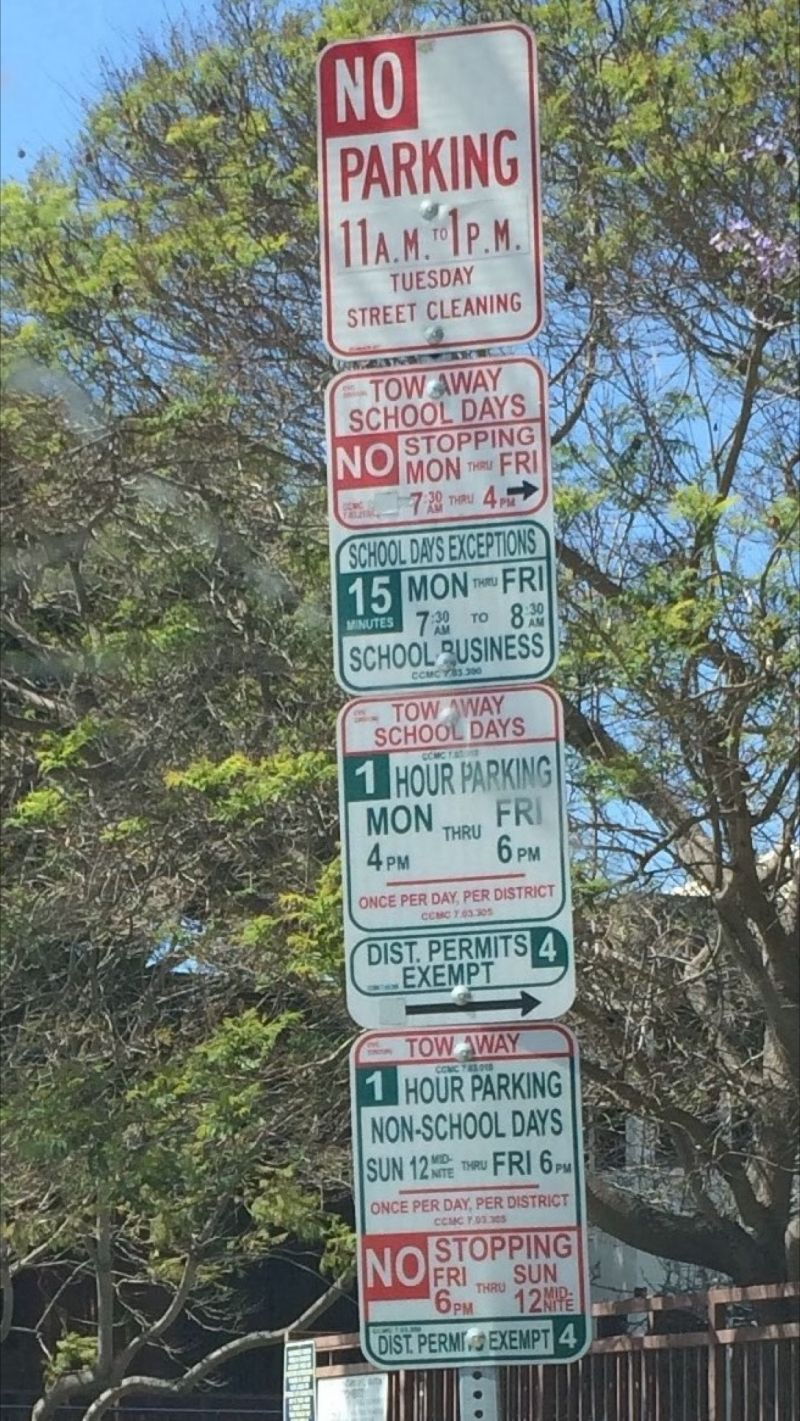

In [9]:
image = Image.open('Data/signs.png')
display(image)

See if `LLaVA` can make sense of it:

In [10]:
prompt = """
    It's 5:00 p.m. on Thursday. Am I allowed to park here for 30 minutes to drop off a package?
    Think it through step by step, and explain your reasoning. Assume that it's OK to park unless
    the rules explicitly state otherwise. Consider all the signs in making a determination, and
    do not return markup in your response.
    """

messages = [
    {
        'role': 'user',
        'content': prompt,
        'images': ['Data/signs.png']
    }
]

response = ollama.chat(
    model='llava:7b',
    messages=messages,
    stream=True
)

for chunk in response:
    print(chunk['message']['content'], end='')

 It looks like there are a few different parking regulations in effect here. Let's break down each sign:

1. The top sign indicates "NO PARKING 8AM-6PM MON-FRI" but does not mention any restrictions on Thursdays. Since it's Thursday at 5PM, you should be allowed to park for a limited time for dropping off a package as long as your activity does not interfere with other pedestrians or residents and does not take longer than 30 minutes.

2. The sign below the "NO PARKING" sign says "1 HOUR PARKING 7AM-6PM MON-FRI," which does not mention Thursday specifically, but it does state that parking is allowed during the time you're there (5PM). However, since you're only dropping off a package and do not need to park for an hour, this sign is likely not relevant to your situation.

3. The next sign states "NO PARKING 7AM-6PM MON-FRI," which again does not mention Thursday. Since it's outside the time frame indicated (5PM), you should be allowed to park here for a limited time.

4. The bottom sig